In [2]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np

In [3]:
df = pd.read_excel('../Telco_customer_churn_adapted_v2.xlsx', sheet_name='D A T A')
copy_df = df.copy()
copy_df.head()

,Customer ID,Tenure Months,Location,Device Class,Games Product,Music Product,Education Product,Call Center,Video Product,Use MyApp,Payment Method,Monthly Purchase (Thou. IDR),Churn Label,CLTV (Predicted Thou. IDR)
0,1710,1,Jakarta,Low End,No internet service,No internet service,No internet service,No,No internet service,No internet service,Digital Wallet,24.505,Yes,5371.6
1,1094,9,Jakarta,Low End,No internet service,No internet service,No internet service,No,No internet service,No internet service,Digital Wallet,24.635,Yes,7023.9
2,143,12,Jakarta,Low End,No internet service,No internet service,No internet service,No,No internet service,No internet service,Digital Wallet,24.700,Yes,4595.5
3,1140,1,Bandung,Low End,No internet service,No internet service,No internet service,No,No internet service,No internet service,Digital Wallet,24.830,Yes,7657.0
4,244,7,Bandung,Low End,No internet service,No internet service,No internet service,No,No internet service,No internet service,Pulsa,25.025,Yes,5835.7


In [4]:
df = df.drop(df[df['Device Class'] == 'Low End'].index)
df

,Customer ID,Tenure Months,Location,Device Class,Games Product,Music Product,Education Product,Call Center,Video Product,Use MyApp,Payment Method,Monthly Purchase (Thou. IDR),Churn Label,CLTV (Predicted Thou. IDR)
104,1605,1,Jakarta,Mid End,No,No,No,No,No,No,Pulsa,30.485,Yes,5872.1
105,1086,13,Jakarta,Mid End,No,No,No,No,No,No,Pulsa,31.070,Yes,3857.1
107,734,9,Jakarta,Mid End,No,No,No,No,No,No,Debit,31.330,Yes,4153.5
109,166,4,Jakarta,Mid End,No,No,No,No,No,No,Digital Wallet,31.525,Yes,2649.4
110,1051,1,Jakarta,Mid End,No,No,No,No,No,No,Pulsa,31.525,Yes,3699.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,7037,12,Jakarta,Mid End,No,Yes,Yes,Yes,Yes,Yes,Pulsa,78.845,No,4862.0
7039,7039,24,Jakarta,Mid End,Yes,No,Yes,Yes,Yes,Yes,Digital Wallet,110.240,No,2782.0
7040,7040,72,Jakarta,High End,No,Yes,Yes,No,Yes,Yes,Credit,134.160,No,7228.0
7041,7041,11,Jakarta,Mid End,Yes,No,No,No,No,No,Pulsa,38.480,No,3630.9


In [5]:
# df = df.iloc(:,1:)
df = df.iloc[:,1:]
# df.head()

In [6]:
numerical_column = ['Tenure Months', 'Monthly Purchase (Thou. IDR)', 'CLTV (Predicted Thou. IDR)']
num_df = df.loc[:, numerical_column]

In [7]:
X = num_df
X.head()

,Tenure Months,Monthly Purchase (Thou. IDR),CLTV (Predicted Thou. IDR)
104,1,30.485,5872.1
105,13,31.070,3857.1
107,9,31.330,4153.5
109,4,31.525,2649.4
110,1,31.525,3699.8


In [8]:
clusters = []
for i in range(1,11):
    km = KMeans(n_clusters=i).fit(X)
    clusters.append(km.inertia_)
    df[f'cluster{i}'] = km.labels_

Text(0, 0.5, 'Inertia')

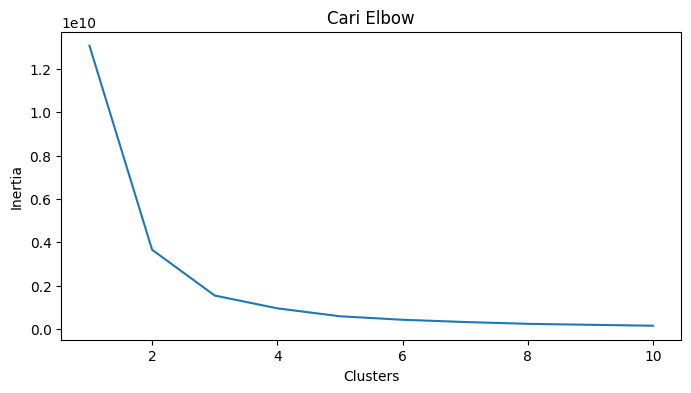

In [9]:
# membuat plot inertia
fig, ax = plt.subplots(figsize=(8, 4))
sns.lineplot(x=list(range(1, 11)), y=clusters, ax=ax)
ax.set_title('Cari Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')

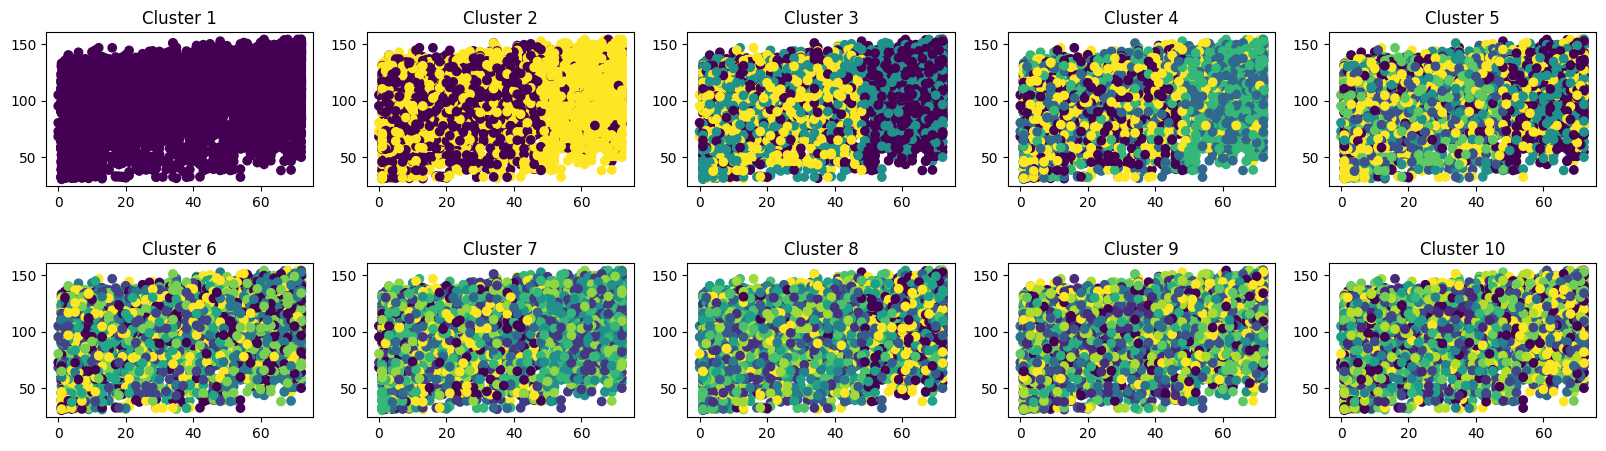

In [10]:
fig, axs = plt.subplots(nrows = 2, ncols = 5, figsize=(20, 5))
plt.subplots_adjust(hspace=0.5)

for i, ax in enumerate(fig.axes, start = 1):
    # print(df[f'cluster{i}'])
    ax.scatter(x=X['Tenure Months'], y=X['Monthly Purchase (Thou. IDR)'], c = df[f'cluster{i}'], cmap='viridis')
    # ax.set_ylim(3, 1.5)
    # ax.set_xlim(0, 1)
    ax.set_title(f'Cluster {i}')

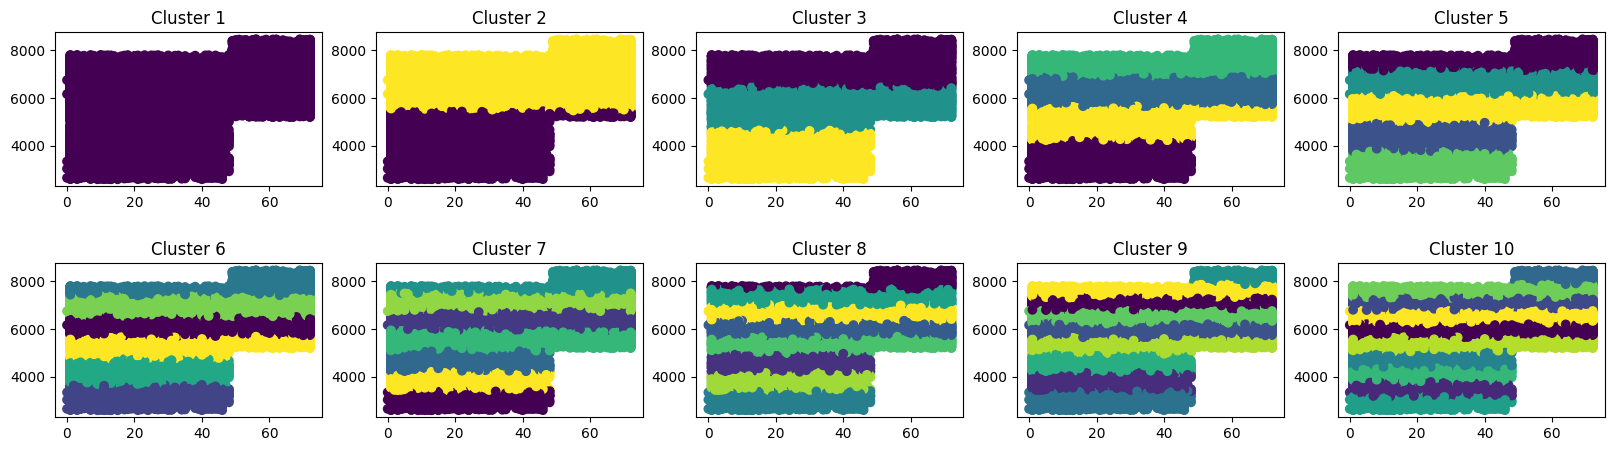

In [11]:
fig, axs = plt.subplots(nrows = 2, ncols = 5, figsize=(20, 5))
plt.subplots_adjust(hspace=0.5)

for i, ax in enumerate(fig.axes, start = 1):
    # print(df[f'cluster{i}'])
    ax.scatter(x=X['Tenure Months'], y=X['CLTV (Predicted Thou. IDR)'], c = df[f'cluster{i}'], cmap='viridis')
    # ax.set_ylim(3, 1.5)
    # ax.set_xlim(0, 1)
    ax.set_title(f'Cluster {i}')

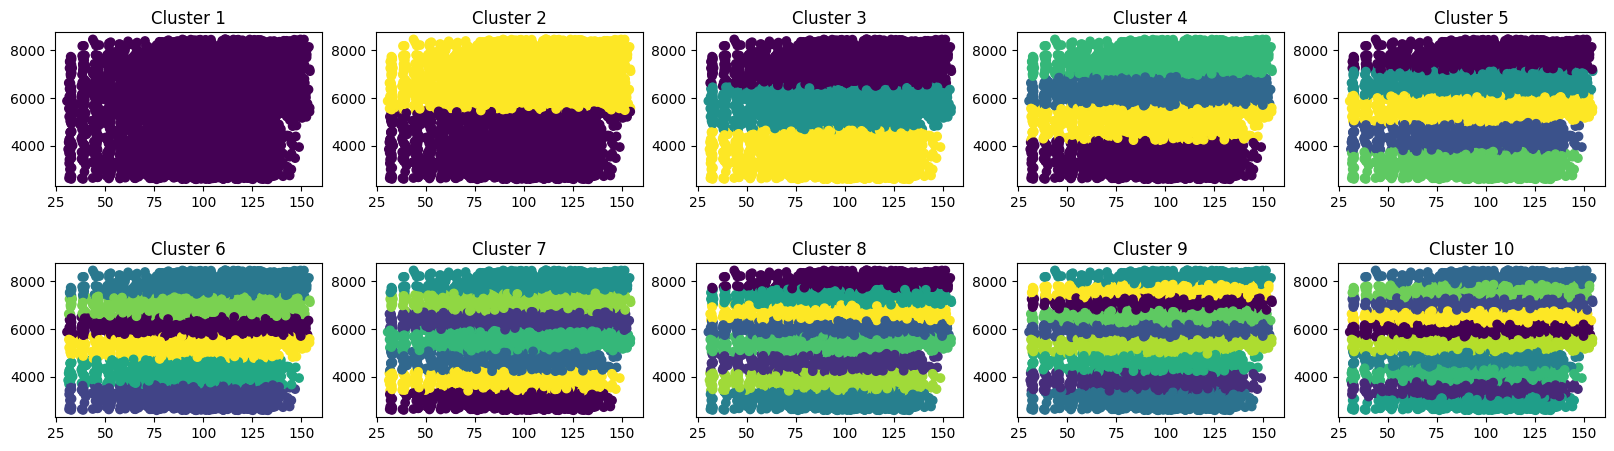

In [12]:
fig, axs = plt.subplots(nrows = 2, ncols = 5, figsize=(20, 5))
plt.subplots_adjust(hspace=0.5)

for i, ax in enumerate(fig.axes, start = 1):
    # print(df[f'cluster{i}'])
    ax.scatter(x=X['Monthly Purchase (Thou. IDR)'], y=X['CLTV (Predicted Thou. IDR)'], c = df[f'cluster{i}'], cmap='viridis')
    # ax.set_ylim(3, 1.5)
    # ax.set_xlim(0, 1) 
    ax.set_title(f'Cluster {i}')

In [13]:
# membuat objek KMeans
km3 = KMeans(n_clusters=4).fit(X)
 
# menambahkan kolom label pada dataset
X['Cluster w/o PCA'] = km3.labels_

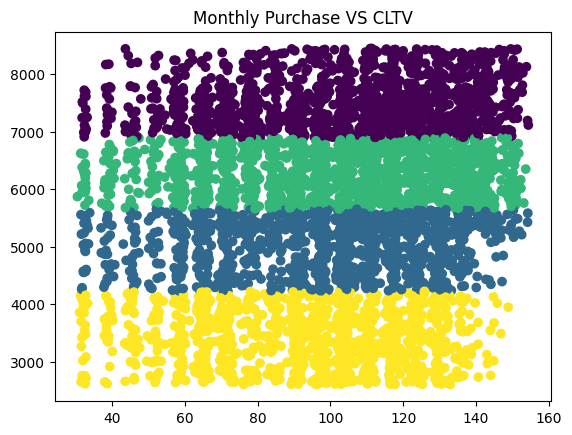

In [14]:
# Membuat scatter plot
plt.scatter(x=X['Monthly Purchase (Thou. IDR)'], y=X['CLTV (Predicted Thou. IDR)'], c=X['Cluster w/o PCA'], cmap='viridis')
# Menambahkan judul
plt.title('Monthly Purchase VS CLTV')
# Menampilkan plot
plt.show()

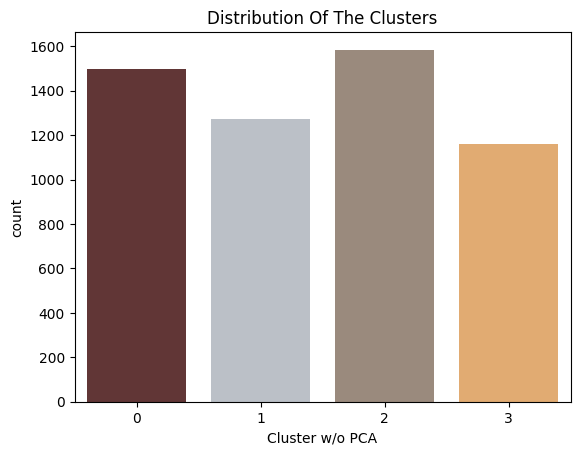

In [15]:
#Plotting countplot of clusters
pal = ["#682F2F","#B9C0C9", "#9F8A78","#F3AB60"]
pl = sns.countplot(x=X["Cluster w/o PCA"], palette= pal)
pl.set_title("Distribution Of The Clusters")
plt.show()

In [16]:
X

,Tenure Months,Monthly Purchase (Thou. IDR),CLTV (Predicted Thou. IDR),Cluster w/o PCA
104,1,30.485,5872.1,2
105,13,31.070,3857.1,3
107,9,31.330,4153.5,3
109,4,31.525,2649.4,3
110,1,31.525,3699.8,3
...,...,...,...,...
7037,12,78.845,4862.0,1
7039,24,110.240,2782.0,3
7040,72,134.160,7228.0,0
7041,11,38.480,3630.9,3


In [17]:
merge_df = copy_df.merge(X, left_index=True, right_index=True, how='inner', suffixes=('_left', '_right'))
merge_df.head()

,Customer ID,Tenure Months_left,Location,Device Class,Games Product,Music Product,Education Product,Call Center,Video Product,Use MyApp,Payment Method,Monthly Purchase (Thou. IDR)_left,Churn Label,CLTV (Predicted Thou. IDR)_left,Tenure Months_right,Monthly Purchase (Thou. IDR)_right,CLTV (Predicted Thou. IDR)_right,Cluster w/o PCA
104,1605,1,Jakarta,Mid End,No,No,No,No,No,No,Pulsa,30.485,Yes,5872.1,1,30.485,5872.1,2
105,1086,13,Jakarta,Mid End,No,No,No,No,No,No,Pulsa,31.070,Yes,3857.1,13,31.070,3857.1,3
107,734,9,Jakarta,Mid End,No,No,No,No,No,No,Debit,31.330,Yes,4153.5,9,31.330,4153.5,3
109,166,4,Jakarta,Mid End,No,No,No,No,No,No,Digital Wallet,31.525,Yes,2649.4,4,31.525,2649.4,3
110,1051,1,Jakarta,Mid End,No,No,No,No,No,No,Pulsa,31.525,Yes,3699.8,1,31.525,3699.8,3


In [18]:
new_df = merge_df.drop([merge_df.columns[14], merge_df.columns[15], merge_df.columns[16]], axis=1)
new_df.head()


,Customer ID,Tenure Months_left,Location,Device Class,Games Product,Music Product,Education Product,Call Center,Video Product,Use MyApp,Payment Method,Monthly Purchase (Thou. IDR)_left,Churn Label,CLTV (Predicted Thou. IDR)_left,Cluster w/o PCA
104,1605,1,Jakarta,Mid End,No,No,No,No,No,No,Pulsa,30.485,Yes,5872.1,2
105,1086,13,Jakarta,Mid End,No,No,No,No,No,No,Pulsa,31.070,Yes,3857.1,3
107,734,9,Jakarta,Mid End,No,No,No,No,No,No,Debit,31.330,Yes,4153.5,3
109,166,4,Jakarta,Mid End,No,No,No,No,No,No,Digital Wallet,31.525,Yes,2649.4,3
110,1051,1,Jakarta,Mid End,No,No,No,No,No,No,Pulsa,31.525,Yes,3699.8,3


In [19]:
new_df['Games Product'].value_counts()

No     3497
Yes    2019
          1
Name: Games Product, dtype: int64

In [20]:
#ordinal mapping
map_dev = {
    'Low End': 0,
    'Mid End': 1,
    'High End': 2,
}

map_prod = {
    'No internet service': 0,
    'No': 1,
    'Yes': 2,
}

map_churn = {
    'No': 0,
    'Yes': 1,
}

In [21]:
new_df.columns

Index(['Customer ID', 'Tenure Months_left', 'Location', 'Device Class',
       'Games Product', 'Music Product', 'Education Product', 'Call Center',
       'Video Product', 'Use MyApp', 'Payment Method',
       'Monthly Purchase (Thou. IDR)_left', 'Churn Label',
       'CLTV (Predicted Thou. IDR)_left', 'Cluster w/o PCA'],
      dtype='object')

In [22]:
# Terapkan mapping ke kolom dataframe
new_df['Device Class'] = new_df['Device Class'].map(map_dev)
new_df['Churn Label'] = new_df['Churn Label'].map(map_churn)

prod_cols = ['Games Product', 'Music Product', 'Education Product', 'Call Center', 'Video Product', 'Use MyApp']
for col in prod_cols:
    # Terapkan mapping ke kolom dataframe
    new_df[col] = new_df[col].map(map_prod)

new_df.head()

,Customer ID,Tenure Months_left,Location,Device Class,Games Product,Music Product,Education Product,Call Center,Video Product,Use MyApp,Payment Method,Monthly Purchase (Thou. IDR)_left,Churn Label,CLTV (Predicted Thou. IDR)_left,Cluster w/o PCA
104,1605,1,Jakarta,1,1.0,1,1,1,1,1,Pulsa,30.485,1,5872.1,2
105,1086,13,Jakarta,1,1.0,1,1,1,1,1,Pulsa,31.070,1,3857.1,3
107,734,9,Jakarta,1,1.0,1,1,1,1,1,Debit,31.330,1,4153.5,3
109,166,4,Jakarta,1,1.0,1,1,1,1,1,Digital Wallet,31.525,1,2649.4,3
110,1051,1,Jakarta,1,1.0,1,1,1,1,1,Pulsa,31.525,1,3699.8,3


In [23]:
nominal_columns = ['Location', 'Payment Method']
new_df = pd.get_dummies(new_df, columns=nominal_columns)
new_df.head()

,Customer ID,Tenure Months_left,Device Class,Games Product,Music Product,Education Product,Call Center,Video Product,Use MyApp,Monthly Purchase (Thou. IDR)_left,Churn Label,CLTV (Predicted Thou. IDR)_left,Cluster w/o PCA,Location_Bandung,Location_Jakarta,Payment Method_Credit,Payment Method_Debit,Payment Method_Digital Wallet,Payment Method_Pulsa
104,1605,1,1,1.0,1,1,1,1,1,30.485,1,5872.1,2,0,1,0,0,0,1
105,1086,13,1,1.0,1,1,1,1,1,31.070,1,3857.1,3,0,1,0,0,0,1
107,734,9,1,1.0,1,1,1,1,1,31.330,1,4153.5,3,0,1,0,1,0,0
109,166,4,1,1.0,1,1,1,1,1,31.525,1,2649.4,3,0,1,0,0,1,0
110,1051,1,1,1.0,1,1,1,1,1,31.525,1,3699.8,3,0,1,0,0,0,1


In [24]:
new_df['Device Class'].value_counts()

2    3096
1    2421
Name: Device Class, dtype: int64

In [25]:
from sklearn.preprocessing import StandardScaler

In [26]:
#Creating a copy of data
ds = new_df.copy()
ds = ds.iloc[:, 1:]

#Scaling
scaler = StandardScaler()
scaler.fit(ds)
scaled_ds = pd.DataFrame(scaler.transform(ds),columns= ds.columns )
print("All features are now scaled")
scaled_ds

All features are now scaled


,Tenure Months_left,Device Class,Games Product,Music Product,Education Product,Call Center,Video Product,Use MyApp,Monthly Purchase (Thou. IDR)_left,Churn Label,CLTV (Predicted Thou. IDR)_left,Cluster w/o PCA,Location_Bandung,Location_Jakarta,Payment Method_Credit,Payment Method_Debit,Payment Method_Digital Wallet,Payment Method_Pulsa
0,-1.296211,-1.130845,-0.759837,-0.886901,-0.884620,-0.767164,-0.981502,-0.990439,-2.435572,1.463489,0.092583,0.51200,-0.632656,0.632656,-0.524702,-0.530597,-0.432982,1.208161
1,-0.808235,-1.130845,-0.759837,-0.886901,-0.884620,-0.767164,-0.981502,-0.990439,-2.415045,1.463489,-1.217511,1.42085,-0.632656,0.632656,-0.524702,-0.530597,-0.432982,1.208161
2,-0.970894,-1.130845,-0.759837,-0.886901,-0.884620,-0.767164,-0.981502,-0.990439,-2.405922,1.463489,-1.024801,1.42085,-0.632656,0.632656,-0.524702,1.884670,-0.432982,-0.827704
3,-1.174217,-1.130845,-0.759837,-0.886901,-0.884620,-0.767164,-0.981502,-0.990439,-2.399080,1.463489,-2.002722,1.42085,-0.632656,0.632656,-0.524702,-0.530597,2.309567,-0.827704
4,-1.296211,-1.130845,-0.759837,-0.886901,-0.884620,-0.767164,-0.981502,-0.990439,-2.399080,1.463489,-1.319783,1.42085,-0.632656,0.632656,-0.524702,-0.530597,-0.432982,1.208161
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5512,-0.848900,-1.130845,-0.759837,1.127522,1.130429,1.303503,1.018847,1.009653,-0.738699,-0.683299,-0.564155,-0.39685,-0.632656,0.632656,-0.524702,-0.530597,-0.432982,1.208161
5513,-0.360925,-1.130845,1.316072,-0.886901,1.130429,1.303503,1.018847,1.009653,0.362900,-0.683299,-1.916510,1.42085,-0.632656,0.632656,-0.524702,-0.530597,2.309567,-0.827704
5514,1.590975,0.884294,-0.759837,1.127522,1.130429,-0.767164,1.018847,1.009653,1.202214,-0.683299,0.974149,-1.30570,-0.632656,0.632656,1.905844,-0.530597,-0.432982,-0.827704
5515,-0.889565,-1.130845,1.316072,-0.886901,-0.884620,-0.767164,-0.981502,-0.990439,-2.155041,-0.683299,-1.364580,1.42085,-0.632656,0.632656,-0.524702,-0.530597,-0.432982,1.208161


In [27]:
from sklearn.decomposition import PCA

In [28]:
scaled_ds = scaled_ds.dropna()

In [29]:
scaled_ds.head()

,Tenure Months_left,Device Class,Games Product,Music Product,Education Product,Call Center,Video Product,Use MyApp,Monthly Purchase (Thou. IDR)_left,Churn Label,CLTV (Predicted Thou. IDR)_left,Cluster w/o PCA,Location_Bandung,Location_Jakarta,Payment Method_Credit,Payment Method_Debit,Payment Method_Digital Wallet,Payment Method_Pulsa
0,-1.296211,-1.130845,-0.759837,-0.886901,-0.88462,-0.767164,-0.981502,-0.990439,-2.435572,1.463489,0.092583,0.51200,-0.632656,0.632656,-0.524702,-0.530597,-0.432982,1.208161
1,-0.808235,-1.130845,-0.759837,-0.886901,-0.88462,-0.767164,-0.981502,-0.990439,-2.415045,1.463489,-1.217511,1.42085,-0.632656,0.632656,-0.524702,-0.530597,-0.432982,1.208161
2,-0.970894,-1.130845,-0.759837,-0.886901,-0.88462,-0.767164,-0.981502,-0.990439,-2.405922,1.463489,-1.024801,1.42085,-0.632656,0.632656,-0.524702,1.884670,-0.432982,-0.827704
3,-1.174217,-1.130845,-0.759837,-0.886901,-0.88462,-0.767164,-0.981502,-0.990439,-2.399080,1.463489,-2.002722,1.42085,-0.632656,0.632656,-0.524702,-0.530597,2.309567,-0.827704
4,-1.296211,-1.130845,-0.759837,-0.886901,-0.88462,-0.767164,-0.981502,-0.990439,-2.399080,1.463489,-1.319783,1.42085,-0.632656,0.632656,-0.524702,-0.530597,-0.432982,1.208161


In [30]:
#Initiating PCA to reduce dimentions aka features to 3
pca = PCA(n_components=3)
pca.fit(scaled_ds)
PCA_ds = pd.DataFrame(pca.transform(scaled_ds), columns=(["col1","col2", "col3"]))
PCA_ds.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,5516.0,8.244151e-17,1.891194,-4.373307,-1.486911,-0.127158,1.475450,4.537092
col2,5516.0,-4.122075e-17,1.580466,-3.235718,-1.322754,-0.068600,1.284294,3.614717
col3,5516.0,-2.061038e-16,1.414710,-1.123346,-0.943468,-0.834374,2.111477,2.504992


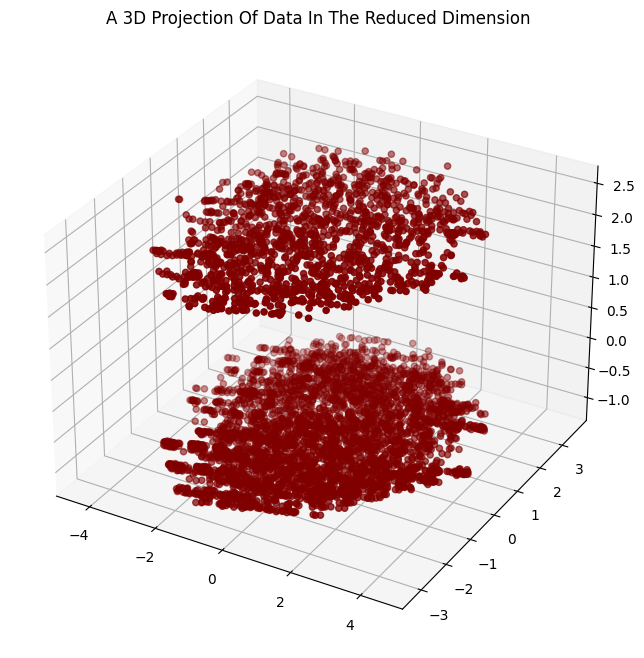

In [31]:
#A 3D Projection Of Data In The Reduced Dimension
x =PCA_ds["col1"]
y =PCA_ds["col2"]
z =PCA_ds["col3"]
#To plot
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, c="maroon", marker="o" )
ax.set_title("A 3D Projection Of Data In The Reduced Dimension")
plt.show()

In [32]:
from yellowbrick.cluster import KElbowVisualizer

Elbow Method to determine the number of clusters to be formed:


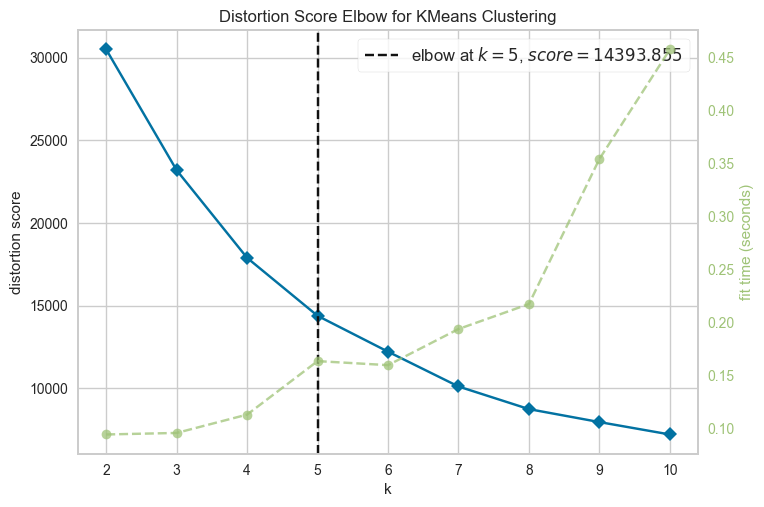

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [33]:
# Quick examination of elbow method to find numbers of clusters to make.
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(PCA_ds)
Elbow_M.show()


In [34]:
from sklearn.cluster import AgglomerativeClustering

In [35]:
PCA_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5516 entries, 0 to 5515
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   col1    5516 non-null   float64
 1   col2    5516 non-null   float64
 2   col3    5516 non-null   float64
dtypes: float64(3)
memory usage: 129.4 KB


In [36]:
new_df = new_df.dropna()

In [37]:
# #Initiating the Agglomerative Clustering model 
# AC = AgglomerativeClustering(n_clusters=5)
# # fit model and predict clusters
# yhat_AC = AC.fit_predict(PCA_ds)
# PCA_ds["Clusters"] = yhat_AC
# #Adding the Clusters feature to the orignal dataframe.
# new_df["Clusters w/ PCA"]= yhat_AC

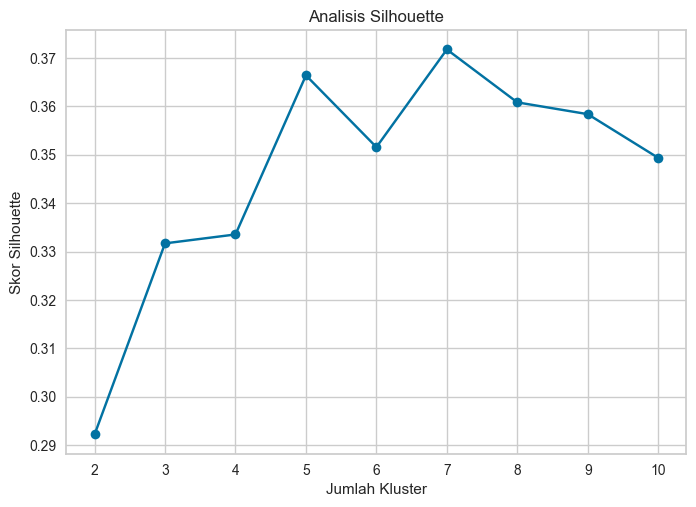

In [38]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

silhouette_scores = []

# Coba berbagai jumlah kluster
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    cluster_labels = kmeans.fit_predict(PCA_ds)
    silhouette_avg = silhouette_score(PCA_ds, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot grafik skor Silhouette terhadap jumlah kluster
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Jumlah Kluster')
plt.ylabel('Skor Silhouette')
plt.title('Analisis Silhouette')
plt.show()


In [39]:
from sklearn.cluster import KMeans

# Tentukan jumlah klaster (misalnya, 5 dalam kasus ini)
n_clusters = 5

# Inisialisasi model pengelompokan K-Means dengan jumlah inisialisasi yang lebih tinggi
kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=0)

# Fit model dan prediksi klaster
yhat_kmeans = kmeans.fit_predict(PCA_ds)

# Tetapkan label klaster ke DataFrame PCA_ds
PCA_ds["Clusters"] = yhat_kmeans

# Tambahkan fitur Klaster ke DataFrame asli (new_df)
new_df["Clusters w/ PCA"] = yhat_kmeans


In [40]:
new_df.head()

,Customer ID,Tenure Months_left,Device Class,Games Product,Music Product,Education Product,Call Center,Video Product,Use MyApp,Monthly Purchase (Thou. IDR)_left,Churn Label,CLTV (Predicted Thou. IDR)_left,Cluster w/o PCA,Location_Bandung,Location_Jakarta,Payment Method_Credit,Payment Method_Debit,Payment Method_Digital Wallet,Payment Method_Pulsa,Clusters w/ PCA
104,1605,1,1,1.0,1,1,1,1,1,30.485,1,5872.1,2,0,1,0,0,0,1,0
105,1086,13,1,1.0,1,1,1,1,1,31.070,1,3857.1,3,0,1,0,0,0,1,0
107,734,9,1,1.0,1,1,1,1,1,31.330,1,4153.5,3,0,1,0,1,0,0,0
109,166,4,1,1.0,1,1,1,1,1,31.525,1,2649.4,3,0,1,0,0,1,0,0
110,1051,1,1,1.0,1,1,1,1,1,31.525,1,3699.8,3,0,1,0,0,0,1,0


In [41]:
merge_df = copy_df.merge(X, left_index=True, right_index=True, how='inner', suffixes=('_left', '_right'))
merge_df.head()


,Customer ID,Tenure Months_left,Location,Device Class,Games Product,Music Product,Education Product,Call Center,Video Product,Use MyApp,Payment Method,Monthly Purchase (Thou. IDR)_left,Churn Label,CLTV (Predicted Thou. IDR)_left,Tenure Months_right,Monthly Purchase (Thou. IDR)_right,CLTV (Predicted Thou. IDR)_right,Cluster w/o PCA
104,1605,1,Jakarta,Mid End,No,No,No,No,No,No,Pulsa,30.485,Yes,5872.1,1,30.485,5872.1,2
105,1086,13,Jakarta,Mid End,No,No,No,No,No,No,Pulsa,31.070,Yes,3857.1,13,31.070,3857.1,3
107,734,9,Jakarta,Mid End,No,No,No,No,No,No,Debit,31.330,Yes,4153.5,9,31.330,4153.5,3
109,166,4,Jakarta,Mid End,No,No,No,No,No,No,Digital Wallet,31.525,Yes,2649.4,4,31.525,2649.4,3
110,1051,1,Jakarta,Mid End,No,No,No,No,No,No,Pulsa,31.525,Yes,3699.8,1,31.525,3699.8,3


In [42]:
# # Pilih peta warna, misalnya 'viridis', 'coolwarm', atau yang lain sesuai preferensi Anda
# cmap = plt.get_cmap('viridis')
# # Plotting the clusters
# fig = plt.figure(figsize=(10,8))
# ax = plt.subplot(111, projection='3d', label="bla")
# ax.scatter(x, y, z, s=40, c=PCA_ds["Clusters"], marker='o', cmap = cmap)
# ax.set_title("The Plot Of The Clusters")
# plt.show()

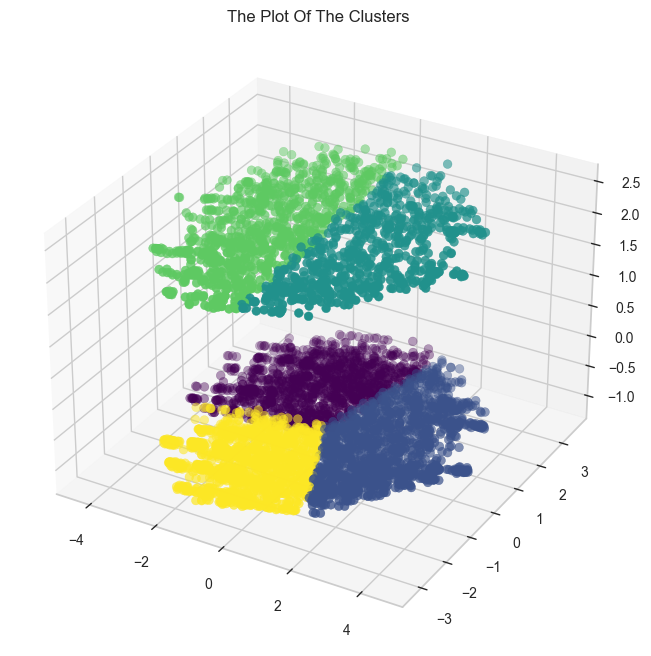

In [43]:
# Pilih peta warna, misalnya 'viridis', 'coolwarm', atau yang lain sesuai preferensi Anda
cmap = plt.get_cmap('viridis')
# Plotting the clusters
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=PCA_ds["Clusters"], marker='o', cmap = cmap)
ax.set_title("The Plot Of The Clusters")
plt.show()

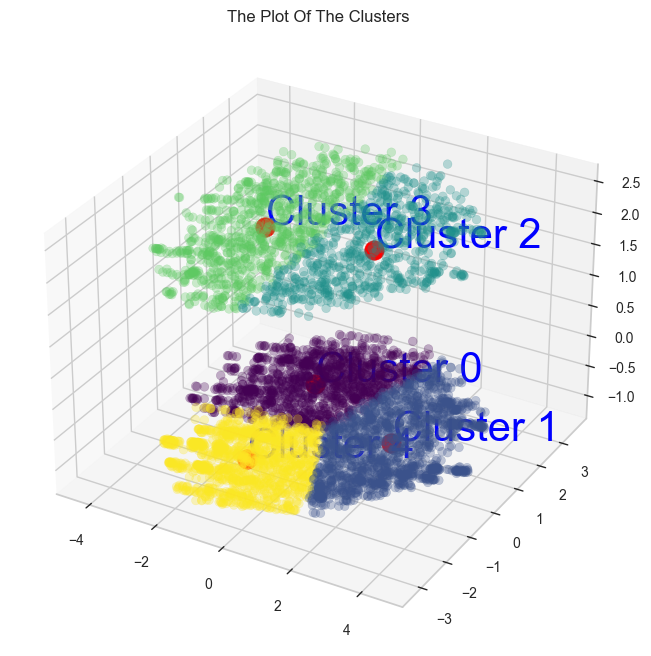

In [44]:
centroids = {}
for cluster in np.unique(PCA_ds["Clusters"]):
    mask = PCA_ds["Clusters"] == cluster
    centroids[cluster] = [np.mean(x[mask]), np.mean(y[mask]), np.mean(z[mask])]

# Pilih peta warna
cmap = plt.get_cmap('viridis')

# Plotting the clusters dengan transparansi
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d')
ax.scatter(x, y, z, s=40, c=PCA_ds["Clusters"], marker='o', cmap=cmap, alpha=0.3)

# Menambahkan centroid sebagai titik besar dengan label
for cluster, centroid in centroids.items():
    ax.scatter(*centroid, color='red', s=200)  # Titik centroid yang besar
    # Menyesuaikan posisi teks
    text_pos = [c + 0.02 for c in centroid]  # Sesuaikan 0.02 ini sesuai kebutuhan
    ax.text(*text_pos, 'Cluster %d' % cluster, color='blue', fontsize=30)

ax.set_title("The Plot Of The Clusters")
plt.show()

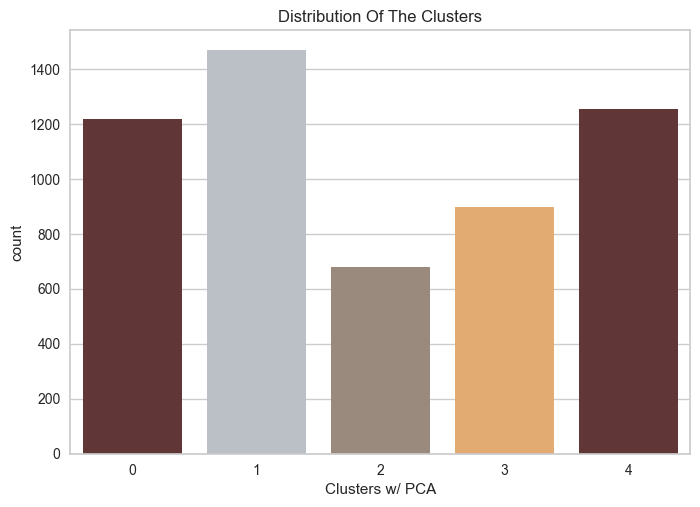

In [45]:
#Plotting countplot of clusters
pal = ["#682F2F","#B9C0C9", "#9F8A78","#F3AB60"]
pl = sns.countplot(x=new_df["Clusters w/ PCA"], palette= pal)
pl.set_title("Distribution Of The Clusters")
plt.show()

<AxesSubplot:>

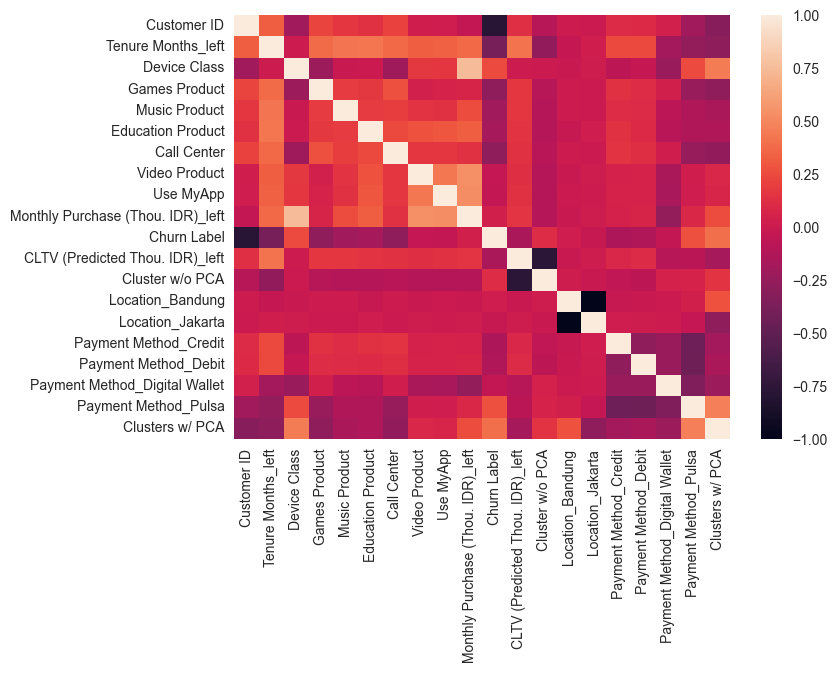

In [46]:
sns.heatmap(new_df.corr(), annot=False, fmt='.1f')

c:\ProgramData\Anaconda3\envs\smartcom\lib\site-packages\ipykernel_launcher.py:1: UserWarning: 
The palette list has fewer values (4) than needed (5) and will cycle, which may produce an uninterpretable plot.
  """Entry point for launching an IPython kernel.


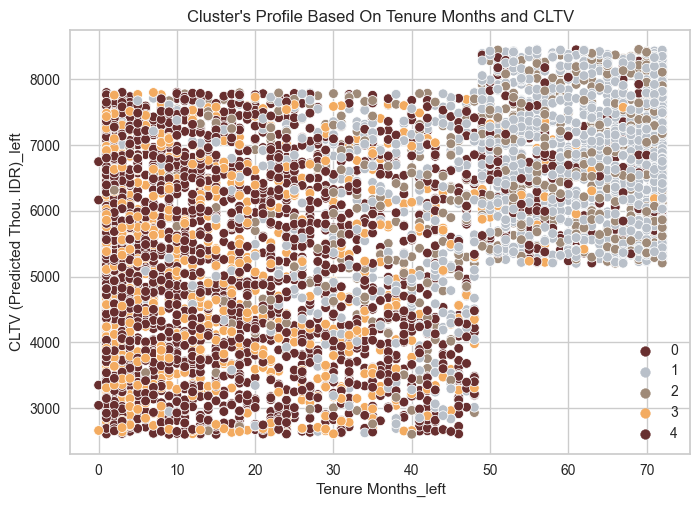

In [47]:
pl = sns.scatterplot(data = new_df,x=new_df["Tenure Months_left"], y=new_df["CLTV (Predicted Thou. IDR)_left"],hue=new_df["Clusters w/ PCA"], palette= pal)
pl.set_title("Cluster's Profile Based On Tenure Months and CLTV")
plt.legend()
plt.show()

c:\ProgramData\Anaconda3\envs\smartcom\lib\site-packages\ipykernel_launcher.py:1: UserWarning: 
The palette list has fewer values (4) than needed (5) and will cycle, which may produce an uninterpretable plot.
  """Entry point for launching an IPython kernel.


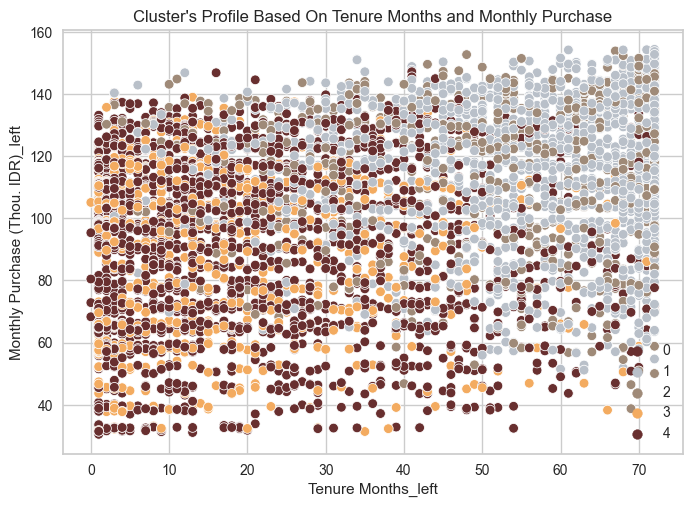

In [48]:
pl = sns.scatterplot(data = new_df,x=new_df["Tenure Months_left"], y=new_df["Monthly Purchase (Thou. IDR)_left"],hue=new_df["Clusters w/ PCA"], palette= pal)
pl.set_title("Cluster's Profile Based On Tenure Months and Monthly Purchase")
plt.legend()
plt.show()

c:\ProgramData\Anaconda3\envs\smartcom\lib\site-packages\ipykernel_launcher.py:1: UserWarning: 
The palette list has fewer values (4) than needed (5) and will cycle, which may produce an uninterpretable plot.
  """Entry point for launching an IPython kernel.


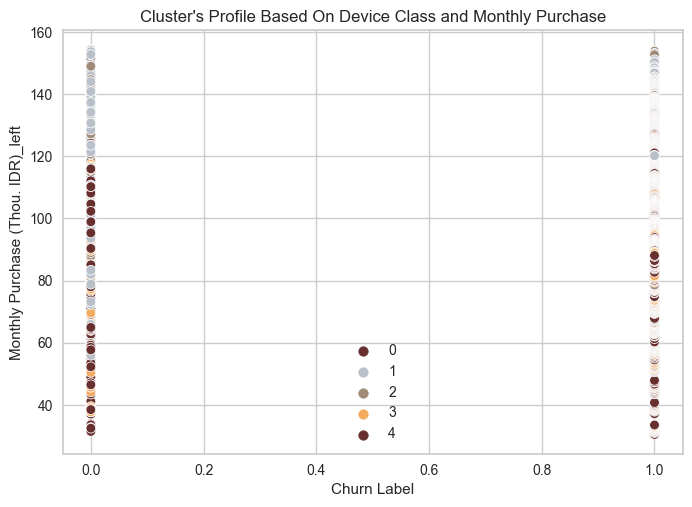

In [49]:
pl = sns.scatterplot(data = new_df,x=new_df["Churn Label"], y=new_df["Monthly Purchase (Thou. IDR)_left"],hue=new_df["Clusters w/ PCA"], palette= pal)
pl.set_title("Cluster's Profile Based On Device Class and Monthly Purchase")
plt.legend()
plt.show()

In [50]:
#ordinal mapping
revmap_dev = {
    0: 'Low End',
    1: 'Mid End',
    2: 'High End',
}

revmap_prod = {
    0: 'No internet service',
    1: 'No',
    2: 'Yes',
}

revmap_churn = {
    0: 'No',
    1: 'Yes',
}

<AxesSubplot:>

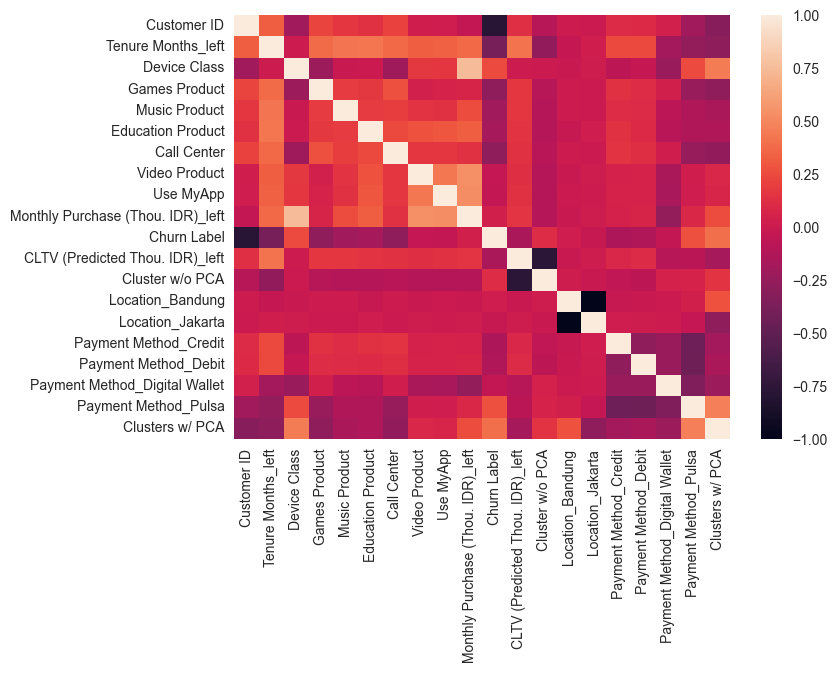

In [51]:
sns.heatmap(new_df.corr(), annot=False, fmt='.1f')

In [52]:
# Terapkan mapping ke kolom dataframe
new_df['Device Class'] = new_df['Device Class'].map(revmap_dev)
new_df['Churn Label'] = new_df['Churn Label'].map(revmap_churn)

prod_cols = ['Games Product', 'Music Product', 'Education Product', 'Call Center', 'Video Product', 'Use MyApp']
for col in prod_cols:
    # Terapkan mapping ke kolom dataframe
    new_df[col] = new_df[col].map(revmap_prod)

new_df.head()

,Customer ID,Tenure Months_left,Device Class,Games Product,Music Product,Education Product,Call Center,Video Product,Use MyApp,Monthly Purchase (Thou. IDR)_left,Churn Label,CLTV (Predicted Thou. IDR)_left,Cluster w/o PCA,Location_Bandung,Location_Jakarta,Payment Method_Credit,Payment Method_Debit,Payment Method_Digital Wallet,Payment Method_Pulsa,Clusters w/ PCA
104,1605,1,Mid End,No,No,No,No,No,No,30.485,Yes,5872.1,2,0,1,0,0,0,1,0
105,1086,13,Mid End,No,No,No,No,No,No,31.070,Yes,3857.1,3,0,1,0,0,0,1,0
107,734,9,Mid End,No,No,No,No,No,No,31.330,Yes,4153.5,3,0,1,0,1,0,0,0
109,166,4,Mid End,No,No,No,No,No,No,31.525,Yes,2649.4,3,0,1,0,0,1,0,0
110,1051,1,Mid End,No,No,No,No,No,No,31.525,Yes,3699.8,3,0,1,0,0,0,1,0


In [53]:
# Mendekode hasil one-hot encoding
df_decoded = new_df.copy()  # Copy DataFrame hasil encoding
df_decoded['Location'] = df_decoded[['Location_Bandung', 'Location_Jakarta']].idxmax(axis=1).str.replace('Location_', '')
df_decoded['Payment Method'] = df_decoded[['Payment Method_Credit', 'Payment Method_Debit', 'Payment Method_Digital Wallet', 'Payment Method_Pulsa']].idxmax(axis=1).str.replace('Payment Method_', '')

# Hapus kolom hasil encoding
df_decoded.drop(['Location_Bandung', 'Location_Jakarta', 'Payment Method_Credit', 'Payment Method_Debit', 'Payment Method_Digital Wallet', 'Payment Method_Pulsa'], axis=1, inplace=True)
df_decoded.head()

,Customer ID,Tenure Months_left,Device Class,Games Product,Music Product,Education Product,Call Center,Video Product,Use MyApp,Monthly Purchase (Thou. IDR)_left,Churn Label,CLTV (Predicted Thou. IDR)_left,Cluster w/o PCA,Clusters w/ PCA,Location,Payment Method
104,1605,1,Mid End,No,No,No,No,No,No,30.485,Yes,5872.1,2,0,Jakarta,Pulsa
105,1086,13,Mid End,No,No,No,No,No,No,31.070,Yes,3857.1,3,0,Jakarta,Pulsa
107,734,9,Mid End,No,No,No,No,No,No,31.330,Yes,4153.5,3,0,Jakarta,Debit
109,166,4,Mid End,No,No,No,No,No,No,31.525,Yes,2649.4,3,0,Jakarta,Digital Wallet
110,1051,1,Mid End,No,No,No,No,No,No,31.525,Yes,3699.8,3,0,Jakarta,Pulsa


In [54]:
df_decoded.columns

Index(['Customer ID', 'Tenure Months_left', 'Device Class', 'Games Product',
       'Music Product', 'Education Product', 'Call Center', 'Video Product',
       'Use MyApp', 'Monthly Purchase (Thou. IDR)_left', 'Churn Label',
       'CLTV (Predicted Thou. IDR)_left', 'Cluster w/o PCA', 'Clusters w/ PCA',
       'Location', 'Payment Method'],
      dtype='object')

In [55]:
df_decoded = df_decoded[['Customer ID', 'Tenure Months_left', 'Location', 'Device Class', 'Games Product',
       'Music Product', 'Education Product', 'Call Center', 'Video Product',
       'Use MyApp', 'Payment Method', 'Monthly Purchase (Thou. IDR)_left', 'Churn Label',
       'CLTV (Predicted Thou. IDR)_left', 'Cluster w/o PCA', 'Clusters w/ PCA'
    ]]

In [56]:
df_decoded.to_excel('5_cluster-fix.xlsx', index=False)